**Prédiction du sepsis avec l'apprentissage automatique**

# **Introduction**

Nous allons explorer un projet complet d'apprentissage automatique axé sur la prédiction du sepsis en utilisant des techniques de classification. Nous allons pouvoir déployer le modèle sous la forme d'une API conviviale, permettant des prédictions en temps réel. La combinaison de l'apprentissage automatique et du développement web a un immense potentiel dans le domaine de la santé et peut contribuer de manière significative à la détection précoce du sepsis et aux soins aux patients.

Le **sepsis** est un terme médical qui désigne toute « réponse inflammatoire généralisée associée à une infection grave ». Cette réponse potentiellement mortelle survient lorsque la réaction de l'hôte à l'infection, l'inflammation systémique et grave de l'organisme, cause des lésions à ses propres tissus et organes. Elle s'accompagne d'un choc cytokinique. Il s'agit d'une condition potentiellement mortelle qui survient lorsque la réponse de l'organisme à l'infection cause des lésions à ses propres tissus et organes.

Objectif:

Création un modèle d'apprentissage automatique pour prédire le sepsis à partir des données fournies.

Création de l'API avec le modele sélectionné.


# **Etape 1: Etude exploratoire des données **

Nous effectuons  une analyse exploratoire des données pour comprendre la distribution des données et les relations entre les variables.

**Dataset:**

Les données pour ce projet sont au format CSV. Les colonnes présentes dans les données sont décrites comme suit :


ID : Numéro unique représentant l'identifiant du patient.

PRG : Plasma glucose.

PL : Résultat d'analyse sanguine 1 (mu U/ml).

PR : Pression sanguine (mm Hg).

SK : Résultat d'analyse sanguine 2 (mm).

TS : Résultat d'analyse sanguine 3 (mu U/ml).

M11 : Indice de masse corporelle (poids en kg / (taille en m)^2).

BD2 : Résultat d'analyse sanguine 4 (mu U/ml).

Age : Âge des patients.

Insurance : Si un patient détient une carte d'assurance valide.

Sepsis : Cible de prédiction. Positif : si un patient en réanimation développera un sepsis, et Négatif : sinon.

# **Importation des bibliothèques nécessaires pour la visualisation des données**

In [ ]:
!pip install catboost

In [ ]:
# Data handling
import pandas as pd
import numpy as np

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
import seaborn as sn
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# EDA (pandas-profiling, etc. )
from statsmodels.genmod.families import Binomial
from scipy.stats import pointbiserialr
import scipy.stats as stats

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,FunctionTransformer,LabelEncoder
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Evaluations
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, RocCurveDisplay, roc_curve, auc
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_val_score
from statistics import stdev
from sklearn.model_selection import KFold

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
from sklearn.model_selection import RandomizedSearchCV

# Other packages
import os, joblib
from joblib import load
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
from google.colab import files

# Sélectionnez le fichier à télécharger
uploaded = files.upload()

In [ ]:
#l'ensemble des données

df = pd.read_csv('/content/data_sepsis (1).csv')
df.head() # preview the data

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [ ]:
df.shape

(599, 11)

In [ ]:
df.columns

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis'],
      dtype='object')

In [ ]:
df.tail()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative
598,ICU200608,1,173,74,0,0,36.8,0.088,38,1,Positive


# **Descriptif de DATA**


Les noms des colonnes ne sont pas très descriptifs.

certaines colonnes contiennent des 0, Cela ne peut pas être possible et indique la présence de erreurs dans notre ensemble de données.

Il y a beaucoup de valeurs aberrantes dans certaines des colonnes numériques.

Il pourrait y avoir des corrélations entre certaines des variables prédictives, entraînant une multicollinéarité.








# **Résolution**

Renommer les noms de colonnes pour qu'ils soient plus descriptifs et plus faciles à comprendre.

Remplacer les zéros dans chaque colonne par la valeur médiane.

Gérer les classes déséquilibrées dans la variable cible en utilisant des techniques telles que le sous-échantillonnage ou le suréchantillonnage.

Utiliser des techniques de visualisation telles que box plots et scatter plots pour identifier les valeurs aberrantes, puis les supprimer.

Utiliser l'analyse de corrélation pour identifier les variables fortement corrélées et envisager de les supprimer ou de les transformer

# **Nettoyage des données**

In [ ]:
# Renommer les colonnes
df = df.rename(columns={
    "PRG": "Plasma_glucose",
    "PL": "Blood_Work_R1",
    "PR": "Blood_Pressure",
    "SK": "Blood_Work_R2",
    "TS": "Blood_Work_R3",
    "M11": "BMI",
    "BD2": "Blood_Work_R4",
    "Age": "Patient_age",
 "Sepssis": "Target"
})

In [ ]:
caractéristiques_numériques = ['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2', 'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Patient_age']

In [ ]:
#dataset
df

,ID,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R2,Blood_Work_R3,BMI,Blood_Work_R4,Patient_age,Insurance,Target
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative



L'ensemble de données montre 0 dans certaines colonnes. Cela ne peut pas être possible et indique la présence de erreurs dans notre ensemble de données. Supprimons d’abord 0 IMC et remplaçons les autres valeurs 0 dans les colonnes par la médiane.

In [ ]:
#Extraction de lignes avec 0 IMC
zero_IMC = df[df['BMI']==0.0]
zero_IMC

,ID,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R2,Blood_Work_R3,BMI,Blood_Work_R4,Patient_age,Insurance,Target
9,ICU200019,8,125,96,0,0,0.0,0.232,54,1,Positive
49,ICU200059,7,105,0,0,0,0.0,0.305,24,0,Negative
60,ICU200070,2,84,0,0,0,0.0,0.304,21,0,Negative
81,ICU200091,2,74,0,0,0,0.0,0.102,22,1,Negative
145,ICU200155,0,102,75,23,0,0.0,0.572,21,1,Negative
371,ICU200381,0,118,64,23,89,0.0,1.731,21,1,Negative
426,ICU200436,0,94,0,0,0,0.0,0.256,25,0,Negative
494,ICU200504,3,80,0,0,0,0.0,0.174,22,1,Negative
522,ICU200532,6,114,0,0,0,0.0,0.189,26,1,Negative


In [ ]:
# Suppression des lignes avec un IMC de 0
df.drop(df[df['BMI'] == 0.0].index, inplace=True)

In [ ]:
#confirmant que tous les 0 IMC ont été supprimés de notre ensemble de données
zero_IMC2 = df[df['BMI']==0.0]
zero_IMC2

,ID,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R2,Blood_Work_R3,BMI,Blood_Work_R4,Patient_age,Insurance,Target



**Remplacez les zéros dans les autres colonnes par la valeur médiane**

In [ ]:
df

,ID,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R2,Blood_Work_R3,BMI,Blood_Work_R4,Patient_age,Insurance,Target
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative


In [ ]:
columns_avec_zeros = ['Plasma_glucose', 'Blood_Work_R2', 'Blood_Work_R3']
for col in columns_avec_zeros:
    df[col].replace(to_replace=0, value=df[col].median(), inplace=True)

In [ ]:
df

,ID,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R2,Blood_Work_R3,BMI,Blood_Work_R4,Patient_age,Insurance,Target
0,ICU200010,6,148,72,35,39,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,39,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,23,39,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,3,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,3,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,3,67,76,23,39,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative


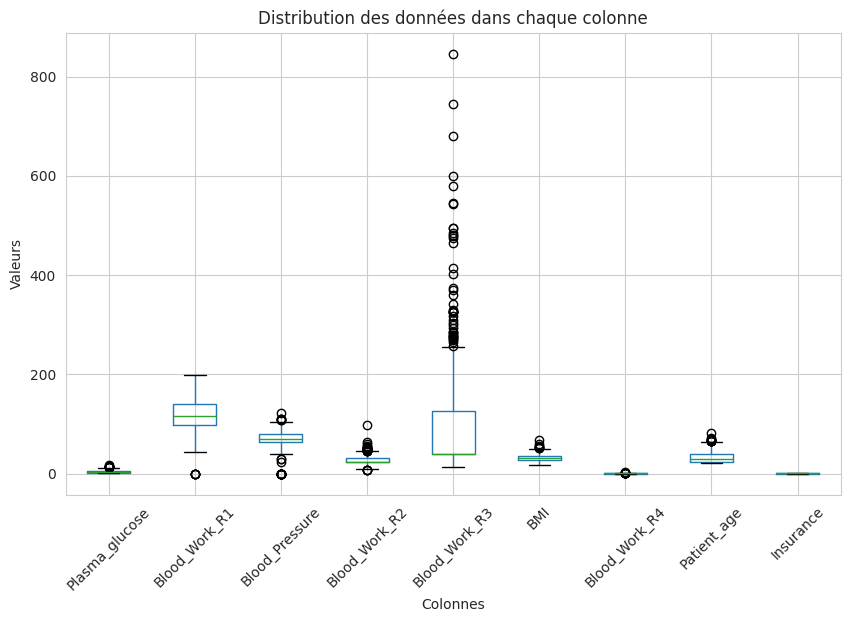

In [ ]:
# Création de la figure avec une taille spécifique
plt.figure(figsize=(10, 6))

# Tracé du boxplot
df.boxplot()

# Rotation des étiquettes de l'axe des x de 45 degrés pour une meilleure lisibilité
plt.xticks(rotation=45)

# Ajout de titres et de légendes
plt.title('Distribution des données dans chaque colonne')
plt.xlabel('Colonnes')
plt.ylabel('Valeurs')

# Affichage du graphique
plt.show()


la présence de valeurs aberrantes dans nos données. Les valeurs aberrantes peuvent fausser les résultats des modèles d'apprentissage automatique et les rendre moins précis et moins fiables.

In [ ]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
num_df = df[numeric_columns]

Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3-Q1
IQR
((num_df< (Q1-1.5 * IQR)) | (num_df > (Q3 + 1.5 * IQR))).any()

Plasma_glucose     True
Blood_Work_R1      True
Blood_Pressure     True
Blood_Work_R2      True
Blood_Work_R3      True
BMI                True
Blood_Work_R4      True
Patient_age        True
Insurance         False
dtype: bool

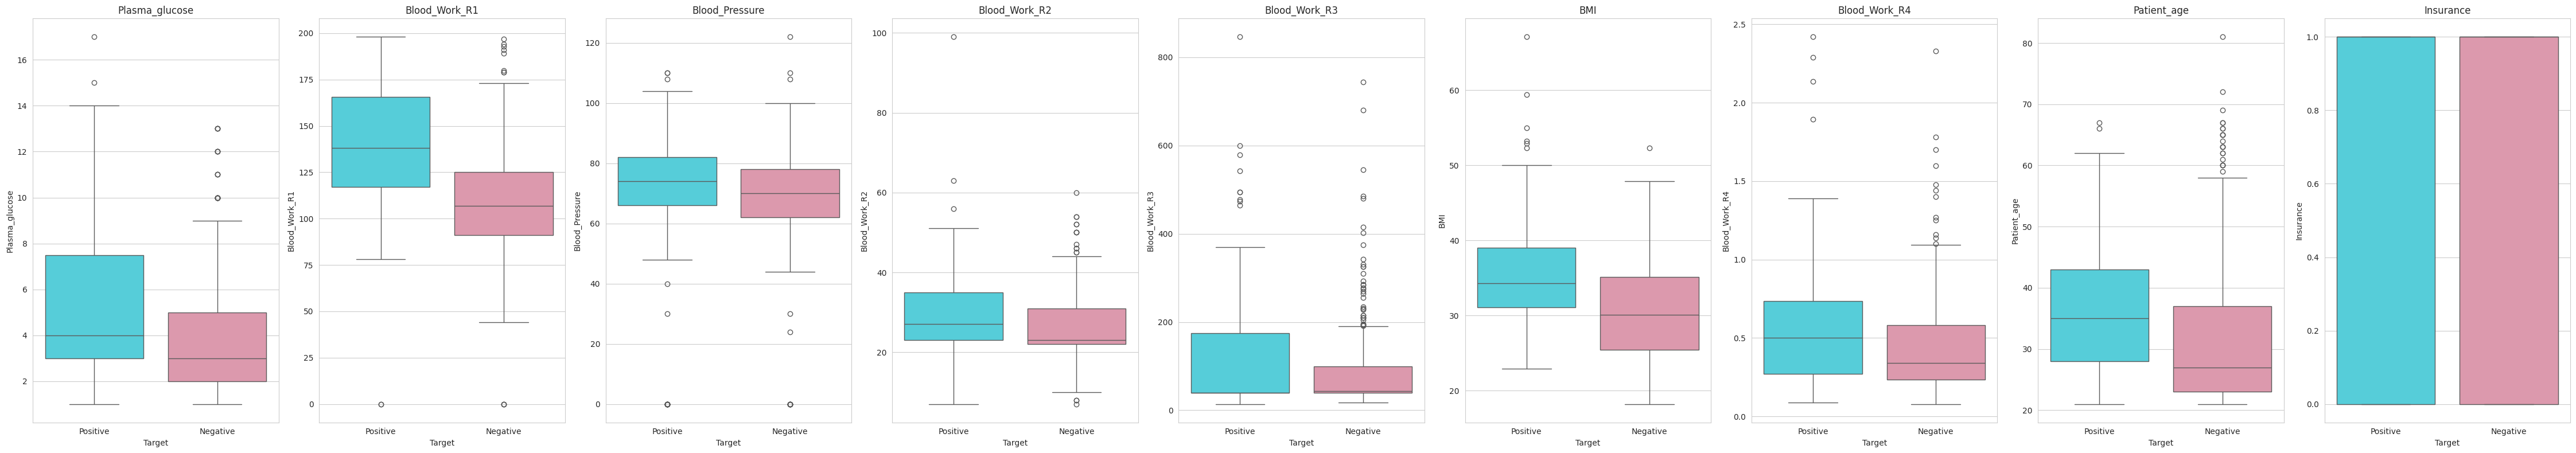

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Déterminer les types de champs et séparer les caractéristiques
string_fields = [type(fld) is str for fld in df.iloc[0, :]]
all_features = [x for x in df.columns if x != 'Target']
categorical_features = [x[1] for x in zip(string_fields, all_features) if x[0] is True]
continues_features = [x for x in all_features if x not in categorical_features]

# Palette de couleurs
color = ('#40DFEF', '#E78EA9')

# Calculer le nombre d'axes nécessaires
num_features = len(continues_features)

# Créer la figure avec le nombre correct d'axes
fig, ax = plt.subplots(1, num_features, figsize=(5*num_features, 8))

# Si il n'y a qu'un seul axe, le mettre dans une liste pour l'itérer
if num_features == 1:
    ax = [ax]

# Tracer les boxplots
for i, p in enumerate(continues_features):
    sns.boxplot(data=df, x='Target', y=p, ax=ax[i], palette=color, whis=1.5)
    ax[i].set_title(p)

# Afficher la figure
plt.tight_layout()
plt.show()


In [ ]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
num_df = df[numeric_columns]

Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3-Q1
IQR
((num_df< (Q1-1.5 * IQR)) | (num_df > (Q3 + 1.5 * IQR))).any()

Plasma_glucose     True
Blood_Work_R1      True
Blood_Pressure     True
Blood_Work_R2      True
Blood_Work_R3      True
BMI                True
Blood_Work_R4      True
Patient_age        True
Insurance         False
dtype: bool

**Toutes les colonnes numériques, à l'exception de l'assurance, présentent des valeurs aberrantes.**

**Calcul de l'intervalle interquartile, définition de la limite des valeurs aberrantes et suppression des valeurs aberrantes du cadre de données**

In [ ]:
# Spécifiez les colonnes qui nous intéressent
columns_of_interest =  ['BMI', 'Blood_Pressure', 'Blood_Work_R1','Blood_Work_R2','Blood_Work_R3','Blood_Work_R4','Patient_age','Plasma_glucose']

# vérifier si des valeurs aberrantes existent toujours dans les colonnes
outliers_exist = False

for column in columns_of_interest:
    # calculer le premier et le troisieme quartiles (Q1 and Q3)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculer l'intervalle interquartile (IQR)
    IQR = Q3 - Q1

    # Définir les limites inférieure et supérieure des valeurs aberrantes
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Modifiez les valeurs de la colonne pour qu'elles soient dans la plage
    df[column] = df[column].clip(lower_bound, upper_bound)

    # Vérifiez s'il existe des valeurs aberrantes dans la colonne
    if (df[column] < lower_bound).any() or (df[column] > upper_bound).any():
        outliers_exist = True
        print(f"Outliers still exist in '{column}'.")

if not outliers_exist:
    print("Aucune valeur aberrante n’existe dans les colonnes spécifiées.")

Aucune valeur aberrante n’existe dans les colonnes spécifiées.


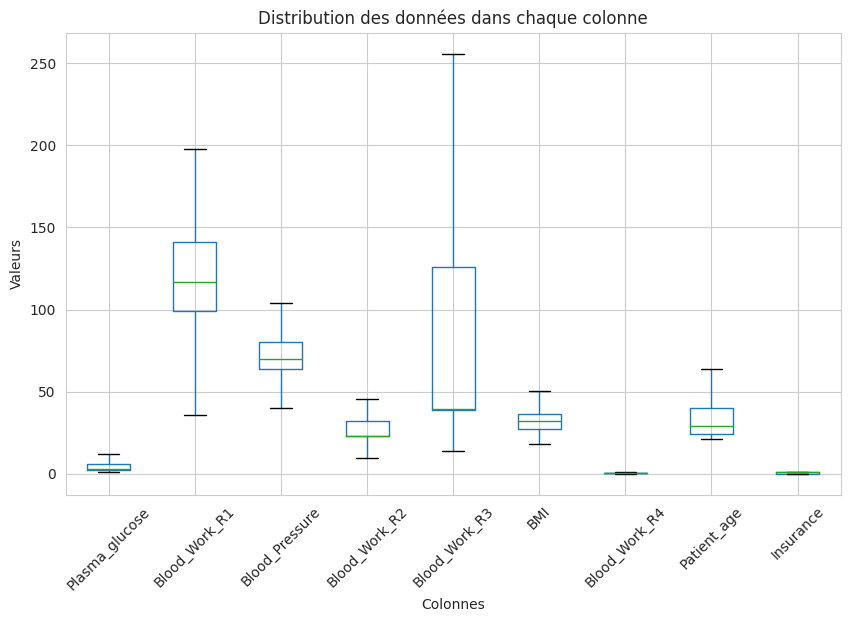

In [ ]:
# Création de la figure avec une taille spécifique
plt.figure(figsize=(10, 6))

# Tracé du boxplot
df.boxplot()

# Rotation des étiquettes de l'axe des x de 45 degrés pour une meilleure lisibilité
plt.xticks(rotation=45)

# Ajout de titres et de légendes
plt.title('Distribution des données dans chaque colonne')
plt.xlabel('Colonnes')
plt.ylabel('Valeurs')

# Affichage du graphique
plt.show()

**Détecter les valeurs aberrantes à l'aide de diagrammes en boîte (box plots)**

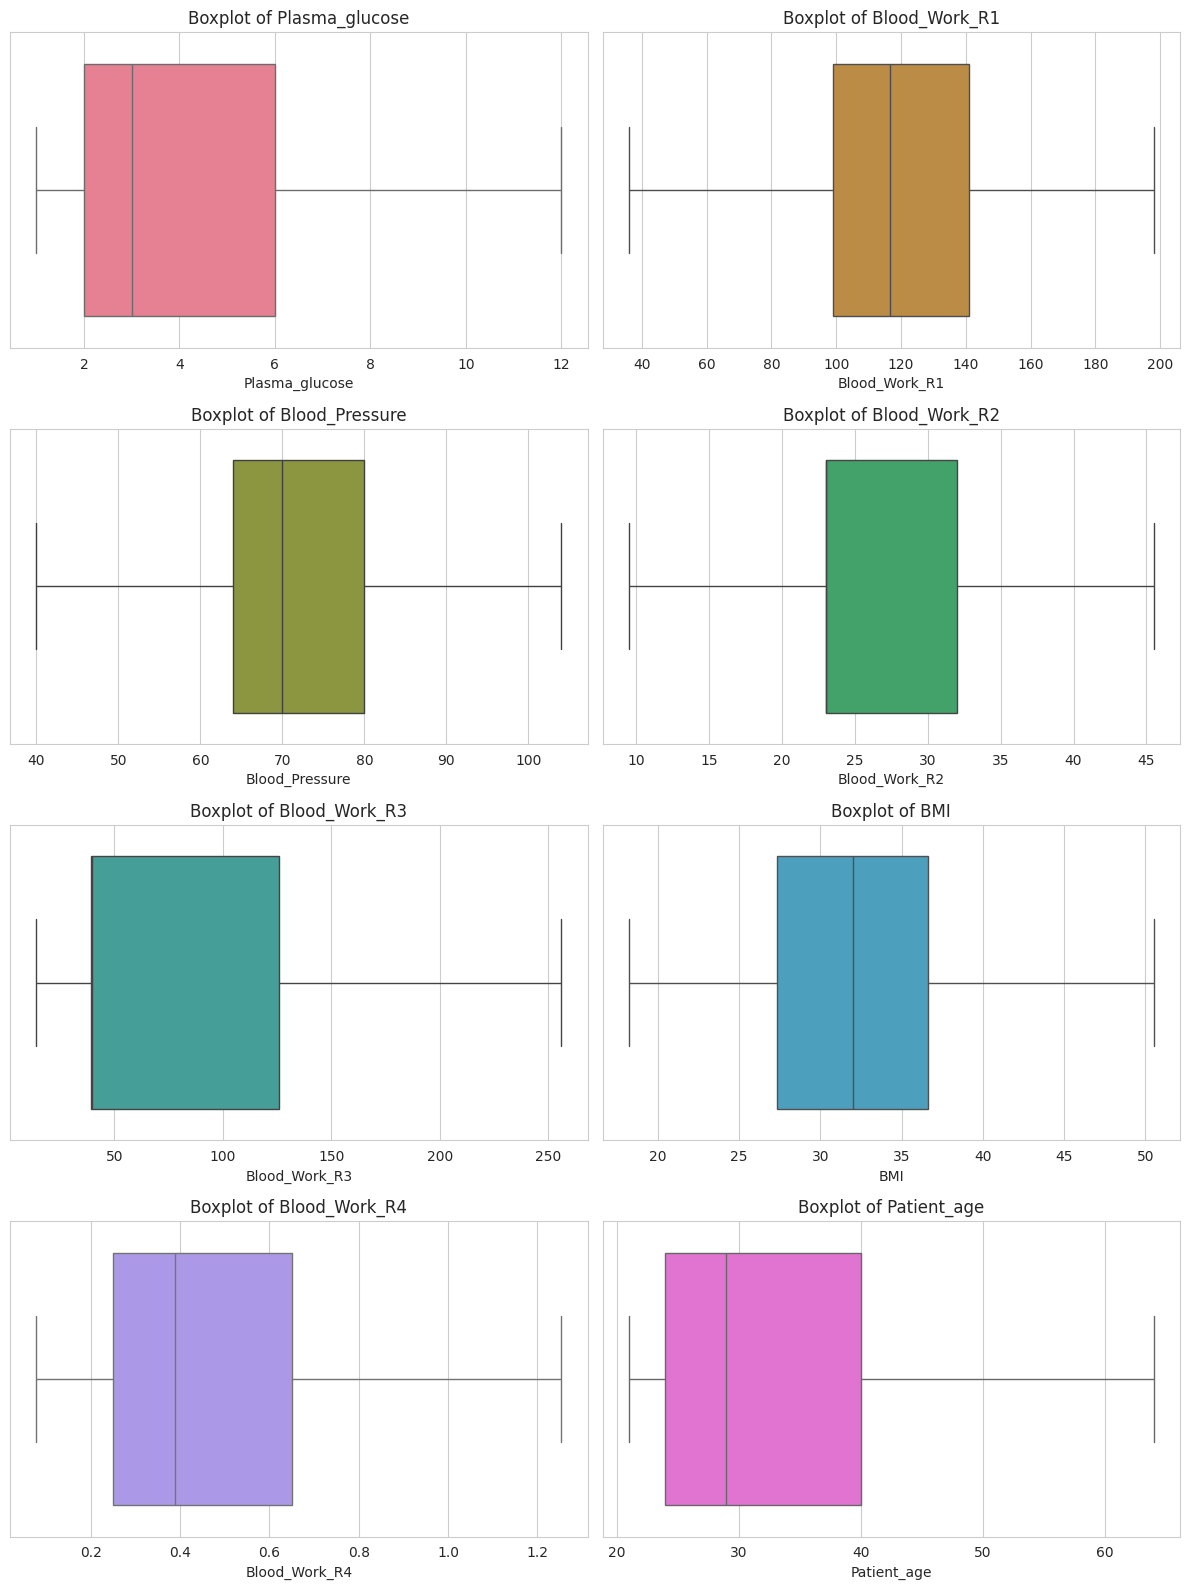

In [ ]:
# Create box plots to visualize outliers

data_without = df.drop(['ID', 'Insurance'], axis=1)

# Identify numeric columns
numeric_columns = data_without.select_dtypes(include=['number']).columns

# Set up subplots
num_rows = len(numeric_columns) // 2 + len(numeric_columns) % 2
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 4 * num_rows))

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Define a color palette with different colors
colors = sns.color_palette("husl", n_colors=len(numeric_columns))

# Iterate over columns and create boxplots for numeric columns with different colors
for i, (column, color) in enumerate(zip(numeric_columns, colors)):
    sns.boxplot(x=data_without[column], ax=axes[i], orient='h', color=color)
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel(column)

# Remove empty subplots if the number of subplots is odd
if len(numeric_columns) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

**Analyse univariée**

Affichage graphique de toutes les colonnes numériques à l'aide de l'histogramme

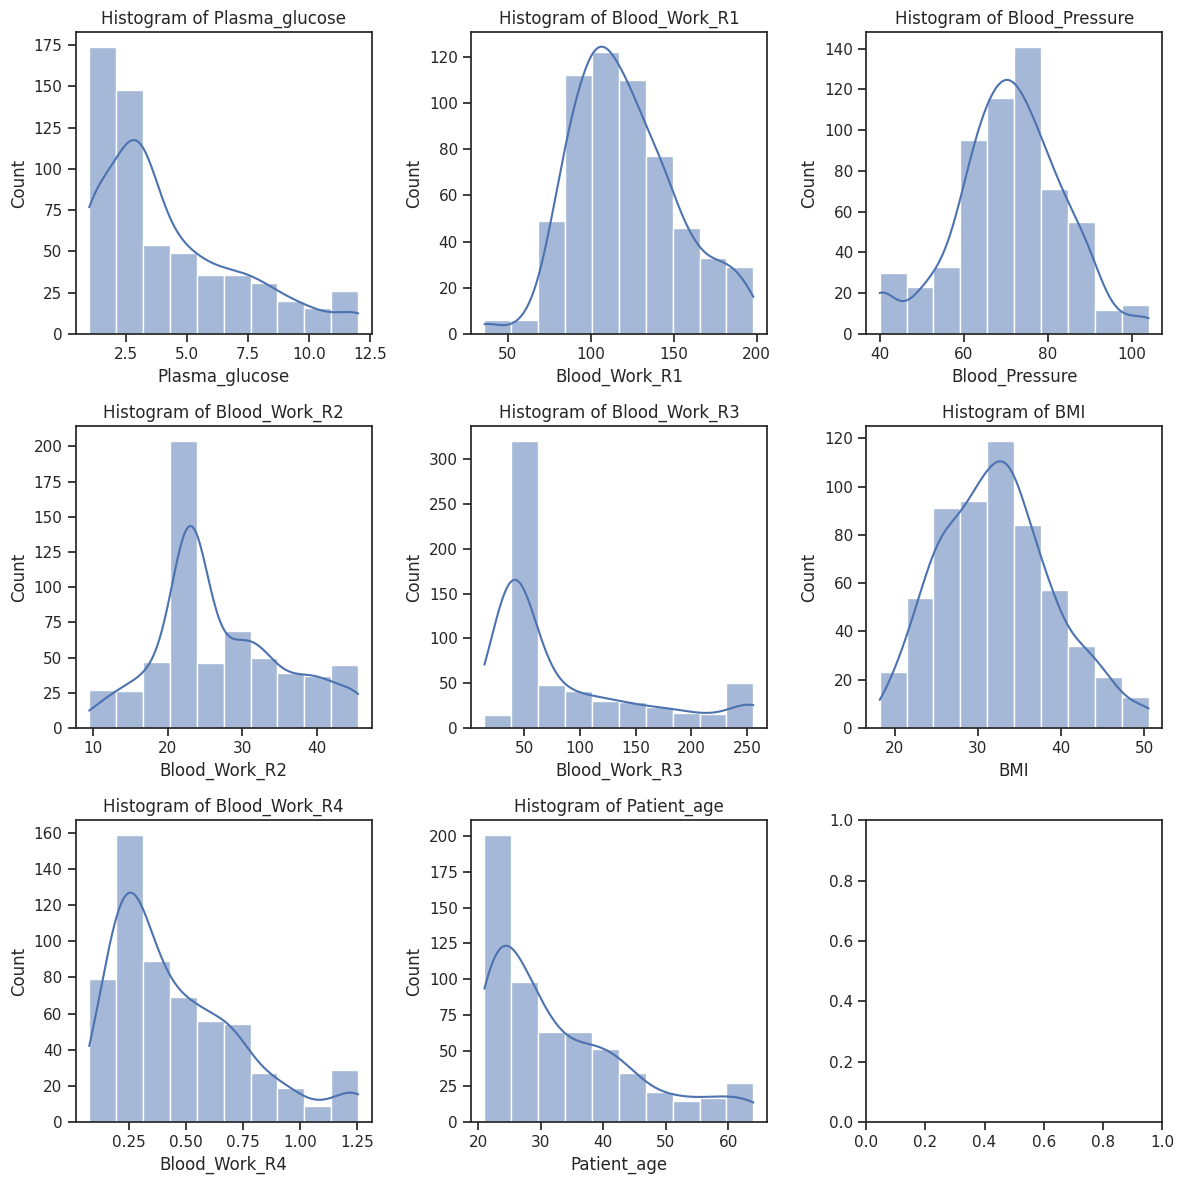

In [ ]:
# Set the style for the plot
sn.set(style="ticks", color_codes=True)

# Create a grid of 3 by 3 subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Flatten the axes array
axes = axes.flatten()

# Plot histograms for each numerical column
for i, col in enumerate(caractéristiques_numériques):
    sn.histplot(data=df, x=col, kde=True, bins=10, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

Remarque:

La plupart des patients se sont présentés pour les analyses de sang 1 et 3

La plupart des patients ont une tension artérielle comprise entre 60 et 80

La plupart des patients ont un taux de glucose inférieur à cinq

La majorité des patients ont moins de 40 ans

In [ ]:
# « Sepsis » doit être une variable binaire (0 pour négatif, 1 pour positif)

df_copy = df.copy()
df_copy['Target'] = df_copy['Target'].replace({'Negative': 0, 'Positive': 1})

# Calculer le coefficient de corrélation point-bisérial
correlation_coefficient, p_value = stats.pointbiserialr(df_copy['Target'], df_copy['Plasma_glucose'])

# Afficher les résultats
print(f"Point-Biserial Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

# Définir le niveau de signification (5%)
alpha = 0.05

#Déterminer si la corrélation est statistiquement significative
if p_value < alpha:
    print("Il existe une corrélation significative entre le sepsis et le PRG.")
else:
    print("Il n'y a pas de corrélation significative entre le sepsis et le PRG.")

Point-Biserial Correlation Coefficient: 0.2304
P-value: 0.0000
Il existe une corrélation significative entre le sepsis et le PRG.


In [ ]:
sepsis_data = df['Target'].value_counts()
sepsis_data

Target
Negative    383
Positive    207
Name: count, dtype: int64

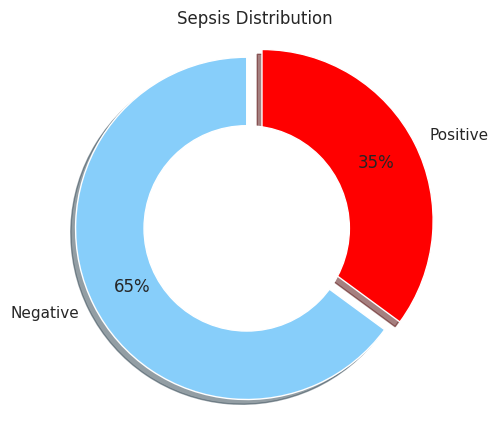

In [ ]:
# Create a pie chart using pyplot to visualize sepsis distribution
plt.figure(figsize=(5, 5))  # Définition de la taille de la figure


# Création du graphique circulaire
plt.pie(sepsis_data, labels=['Negative', 'Positive'], colors=['lightskyblue', 'red'],
        startangle=90, shadow=True, explode=(0, 0.1), autopct='%1.0f%%', pctdistance=0.75)

# Ajout d'un cercle au centre pour transformer le graphique en un donut chart
circle = plt.Circle((0, 0), 0.6, color='white')  # Création d'un cercle de rayon 0.6
plt.gca().add_artist(circle)  # Ajout du cercle à l'axe actuel

plt.axis('equal')  # Assure un ratio aspect égal pour que le graphique soit dessiné comme un cercle
plt.title('Sepsis Distribution')  # Titre du graphique
plt.show()  # Afficher le graphique

In [ ]:
insurance_data = df['Insurance'].value_counts()
insurance_data

Insurance
1    405
0    185
Name: count, dtype: int64

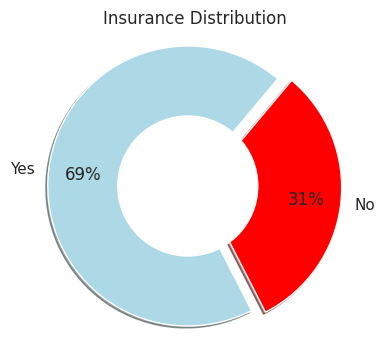

In [ ]:
# Create a pie chart using pyplot to visulaize insurance distribution

plt.figure(figsize=(4, 4))

plt.pie(insurance_data, labels=['Yes','No'], colors=['LightBlue','red'], startangle=50, shadow=True, radius=2,
     explode=(0,0.2),autopct='%1.0f%%', pctdistance=0.75 ,  )
Circle=plt.Circle((0,0), 1, color='white')
c= plt.gcf()

c.gca().add_artist(Circle)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.
plt.title('Insurance Distribution')
plt.show()

#  Détecter les valeurs aberrantes à l'aide de diagrammes en boîte (box plots)

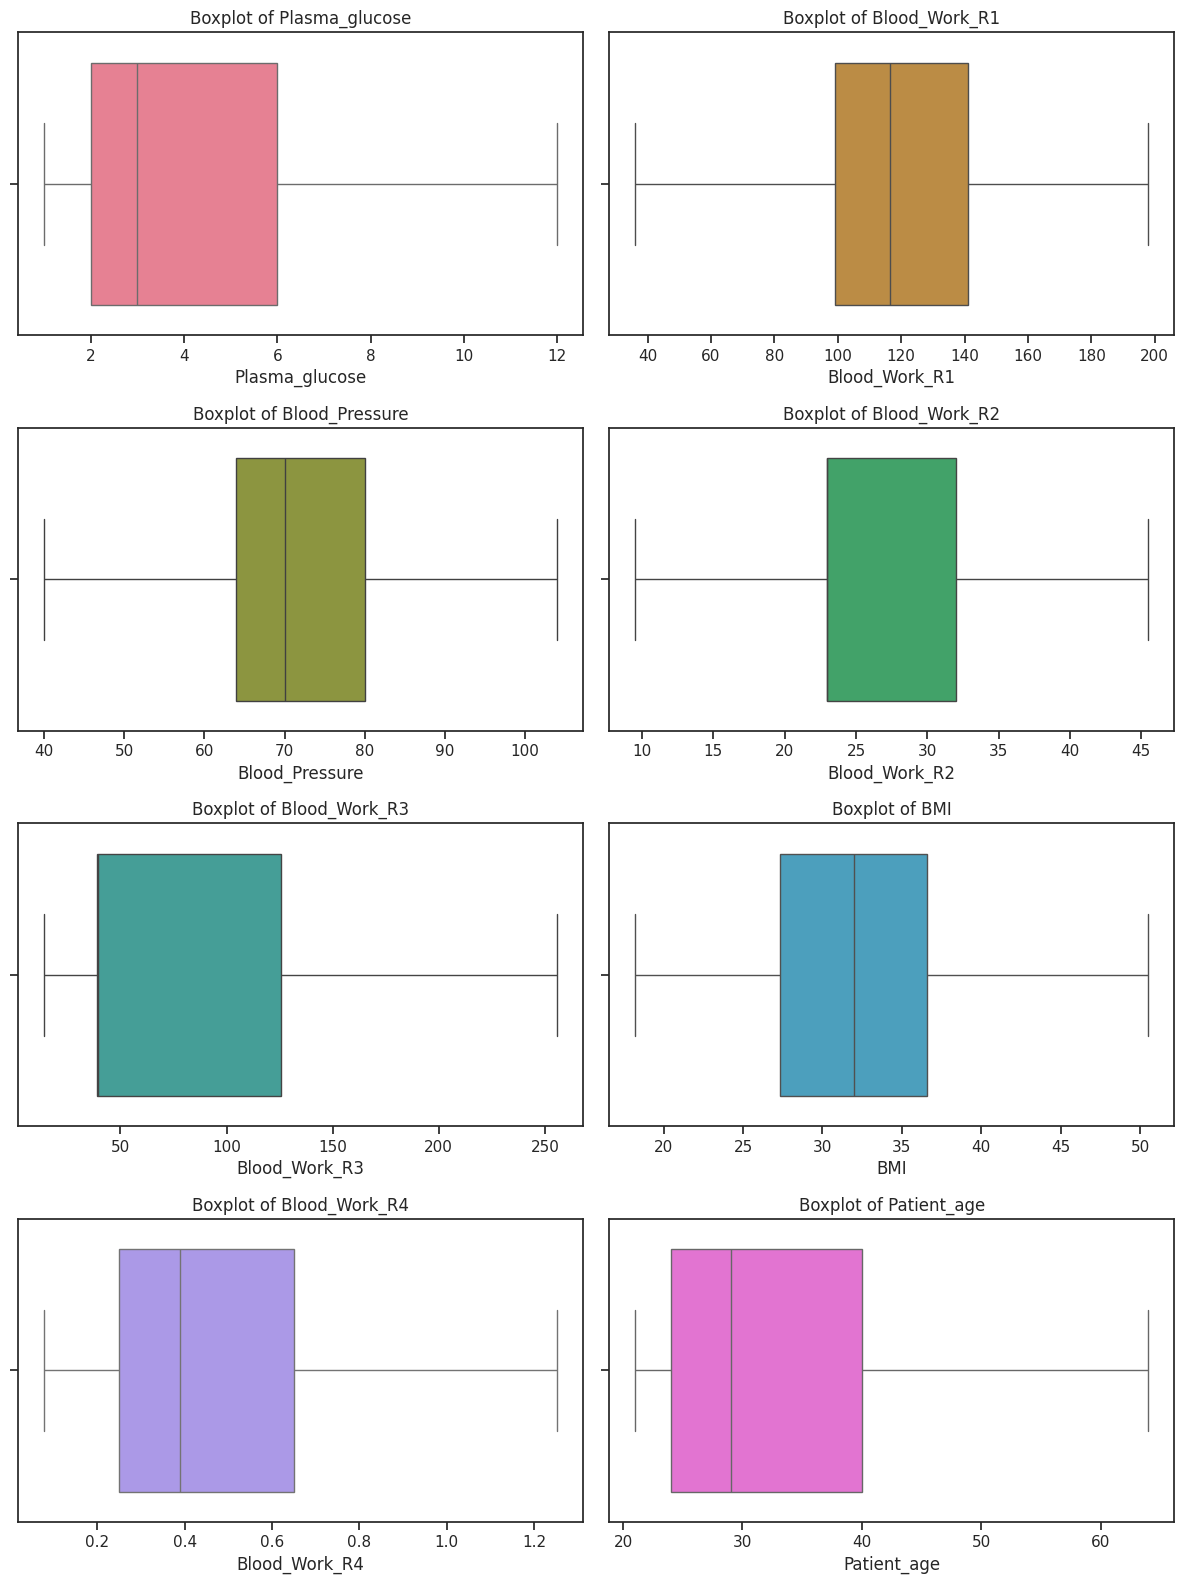

In [ ]:
# Create box plots to visualize outliers

data_without = df.drop(['ID', 'Insurance'], axis=1)

# Identify numeric columns
numeric_columns = data_without.select_dtypes(include=['number']).columns

# Set up subplots
num_rows = len(numeric_columns) // 2 + len(numeric_columns) % 2
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 4 * num_rows))

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Define a color palette with different colors
colors = sns.color_palette("husl", n_colors=len(numeric_columns))

# Iterate over columns and create boxplots for numeric columns with different colors
for i, (column, color) in enumerate(zip(numeric_columns, colors)):
    sns.boxplot(x=data_without[column], ax=axes[i], orient='h', color=color)
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel(column)

# Remove empty subplots if the number of subplots is odd
if len(numeric_columns) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

Nous avons vérifié les box plots qu'il n'y a pas de valeurs aberrantes, cela suggère que les données sont relativement propres et qu'il n'y a pas de valeurs extrêmes qui pourraient fausser nos analyses.

# **Analyse des données**

**la distribution du glucose plasmatique (PRG) parmi les patients qui développent un sepsis par rapport à ceux qui n'en développent pas**

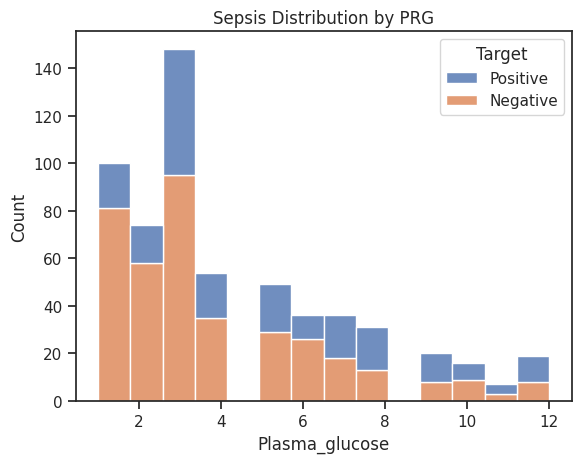

In [ ]:
sns.histplot(x='Plasma_glucose', hue='Target', data=df, bins=14, alpha=0.8, multiple='stack')
plt.title('Sepsis Distribution by PRG')
plt.show()

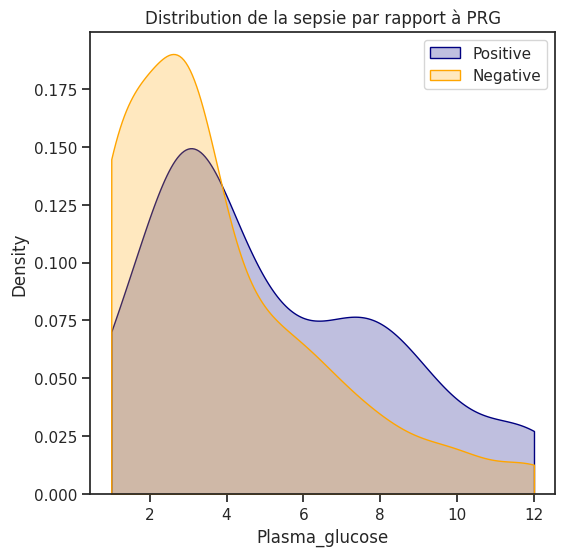

In [ ]:
# Utilisons une distribution de densité de probabilité pour montrer la distribution de la sepsie liée à PRG

def kdeplot(x):
    plt.figure(figsize=(6, 6))
    plt.title('Distribution de la sepsie par rapport à PRG')
    ax0 = sns.kdeplot(df[df['Target'] == 'Positive'][x], color='navy', label='Target: Oui', fill=True, cut=0)
    ax1 = sns.kdeplot(df[df['Target'] == 'Negative'][x], color='orange', label='Target: Non', fill=True, cut=0)
    plt.legend(['Positive', 'Negative'], loc='upper right')

kdeplot('Plasma_glucose')



Il y a plus de cas de sepsis chez les personnes ayant une glycémie
plasmatique (PRG) plus élevée.

Un PRG inférieur à 4,0 présente plus de cas négatifs de sepsis

# **Quelle est la corrélation entre la pression artérielle (PR) et la probabilité de développement d’un sepsis ?**

Correlation coefficient: 0.2304342959178704
P-value: 1.4985620583561765e-08


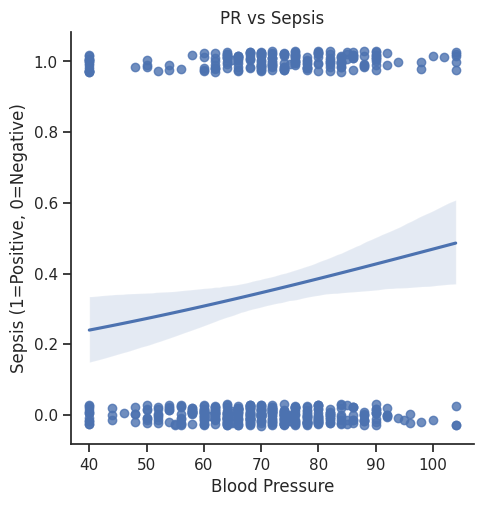

In [ ]:
# Calculer la corrélation point-bisériale
corr, p_value = pointbiserialr(df_copy["Plasma_glucose"], df_copy["Target"])

# Print the correlation coefficient and p-value
print("Correlation coefficient:", corr)
print("P-value:", p_value)

# Plot the data points and visualize
# logistic regression for binary dependent variable

sns.lmplot(data=df_copy, x="Blood_Pressure", y="Target", logistic=True, y_jitter=.03)
plt.xlabel("Blood Pressure")
plt.ylabel("Sepsis (1=Positive, 0=Negative)")
plt.title("PR vs Sepsis")
plt.show()


Le coefficient de corrélation de 0.23. Cela signifie que, en général, à mesure que la pression sanguine augmente, la probabilité de sepsis augmente légèrement.

Cependant, une valeur p-value de 0,498 suggère que la corrélation observée pourrait ne pas être statistiquement significative au niveau de signification de 0,05.

Existe-t-il des différences notables dans l’indice de masse corporelle (M11) entre les patients avec et sans sepsis ?

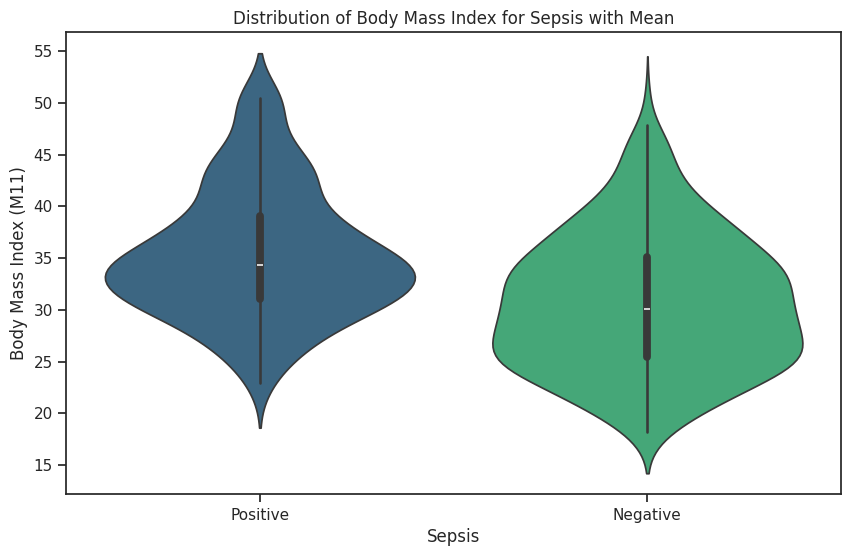

In [ ]:
# Comparaison de la distribution de l'indice de masse corporelle pour les patients des deux groupes à l'aide de graphiques

plt.figure(figsize=(10, 6))
sns.violinplot(x=df['Target'], y=df['BMI'], palette='viridis')

# Set labels and title
plt.xlabel('Sepsis')
plt.ylabel('Body Mass Index (M11)')
plt.title('Distribution of Body Mass Index for Sepsis with Mean')
plt.show()

**L’IMC des cas de sepsis positifs et négatifs est concentré autour de la médiane.**

**Les cas positifs de sepsis coïncident avec un IMC plus élevé que les cas négatifs**

**Comment l'âge varie-t-il entre les patients qui développent un sepsis et ceux qui ne le développent pas ?**

In [ ]:
# Obtenir un DataFrame pour les cas positifs et un autre pour les cas négatifs
cas_positifs = df[df['Target'] == 'Positive']
cas_negatifs = df[df['Target'] == 'Negative']

In [ ]:
positive_age_stats = cas_positifs['Patient_age'].describe()
positive_age_stats

count    207.000000
mean      36.589372
std       10.800058
min       21.000000
25%       28.000000
50%       35.000000
75%       43.000000
max       64.000000
Name: Patient_age, dtype: float64

In [ ]:
negative_age_stats = cas_negatifs['Patient_age'].describe()
negative_age_stats

In [ ]:
age_group= df[df.Target=='Positive'].groupby ('Patient_age', as_index=False)['ID'].count()
age_group

,Patient_age,ID
0,21,5
1,22,6
2,23,6
3,24,6
4,25,12
5,26,6
6,27,5
7,28,10
8,29,13
9,30,5


Text(0.5, 1.0, 'Åge group of patients with sepsis')

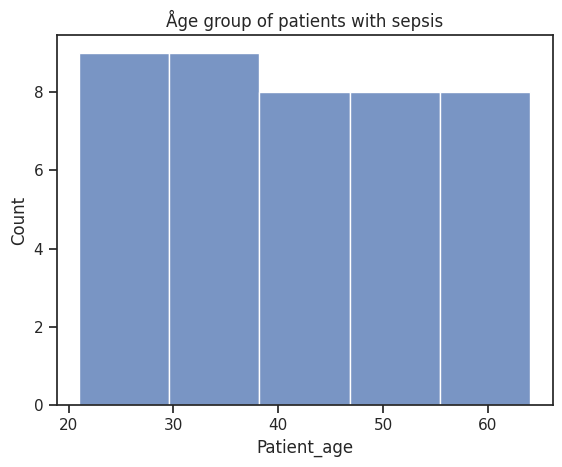

In [ ]:
sns.histplot(data=age_group, x="Patient_age", bins=5)
plt.title('Åge group of patients with sepsis')

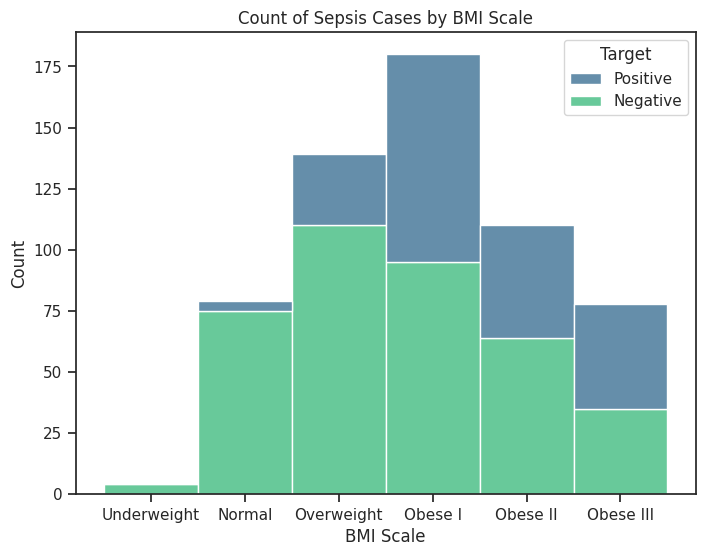

In [ ]:
df_temp = df.copy()
df_temp['BMI_Scale'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')],
                                    labels=['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Obese III'])

plt.figure(figsize=(8, 6))
sns.histplot(x='BMI_Scale', hue='Target', data=df_temp, multiple='stack', palette='viridis')

# Définir les étiquettes et le titre
plt.xlabel('BMI Scale')
plt.ylabel('Count')
plt.title('Count of Sepsis Cases by BMI Scale')

# Afficher le graphe
plt.show()

Les patients avec un IMC plus faible sont moins susceptibles de souffrir de sepsis

**De plus en plus de patients atteints de sepsis sont en surpoids et obèses.**

**Moins ou pas de cas de sepsis avec un poids normal ou insuffisant.**

Les cas négatifs commencent à diminuer à mesure que l’IMC augmente

In [ ]:
# Afficher le DataFrame pour vérifier la conversion
print("DataFrame après conversion en numérique:")
print(df)

DataFrame après conversion en numérique:
            ID  Plasma_glucose  Blood_Work_R1  Blood_Pressure  Blood_Work_R2  \
0    ICU200010               6            148              72           35.0   
1    ICU200011               1             85              66           29.0   
2    ICU200012               8            183              64           23.0   
3    ICU200013               1             89              66           23.0   
4    ICU200014               3            137              40           35.0   
..         ...             ...            ...             ...            ...   
594  ICU200604               6            123              72           45.0   
595  ICU200605               3            188              82           14.0   
596  ICU200606               3             67              76           23.0   
597  ICU200607               1             89              40           19.0   
598  ICU200608               1            173              74           23.0   

In [ ]:
from scipy.stats import ttest_ind
# Split the data into two groups based on the Sepssis variable
target_positive = df[df['Target'] == 'Positive']
target_negative= df[df['Target'] == 'Negative']

# Extract the Age(Patient_age) values for each group
age_target_positive = target_positive['Patient_age']
age_target_negative = target_negative['Patient_age']

# Perform independent samples t-test
t_statistic, p_value = ttest_ind(age_target_positive, age_target_negative)

# Print the results
print("P-Value:", p_value)
print("T-Statistic:", t_statistic)

P-Value: 3.4577022949183645e-07
T-Statistic: 5.1556614056454775


# **Existe-t-il une tendance dans les résultats des analyses de sang (PL, SK, TS, BD2) qui distingue les patients atteints de sepsis de ceux qui n'en ont pas ?**

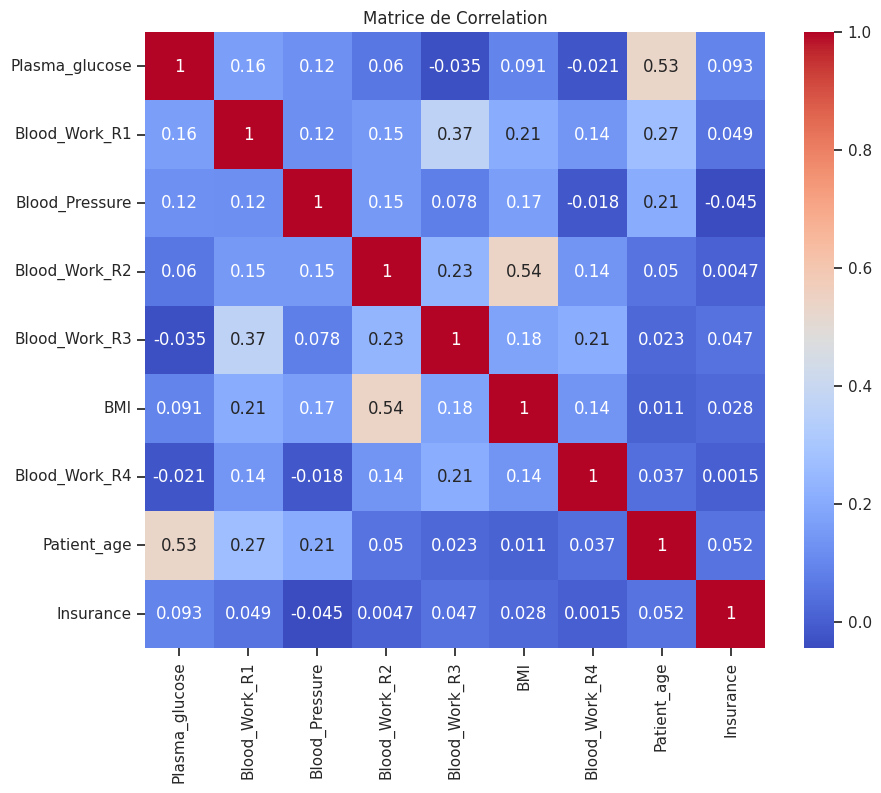

In [ ]:
# Matrice de Correlation
plt.figure(figsize=(10, 8))
sn.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de Correlation')
plt.show()

In [ ]:
# Calculate the correlation matrix
correlation_matrix = num_df.corr()

# Set the threshold for high correlation
threshold = 0.5

# Find the highly correlated variables
high_correlation = (correlation_matrix.abs() > threshold) & (correlation_matrix != 1)

# Get the variable pairs with high correlation
high_correlation_pairs = [(i, j) for i in high_correlation.columns for j in high_correlation.columns if high_correlation.loc[i, j]]

# Print the highly correlated variables
for pair in high_correlation_pairs:
    var1, var2 = pair
    correlation_value = correlation_matrix.loc[var1, var2]
    print(f"{var1} et {var2} sont fortement corrélés(correlation value:{correlation_value})")

Plasma_glucose et Patient_age sont fortement corrélés(correlation value:0.5307618646199184)
Blood_Work_R2 et BMI sont fortement corrélés(correlation value:0.5420169830360818)
BMI et Blood_Work_R2 sont fortement corrélés(correlation value:0.5420169830360818)
Patient_age et Plasma_glucose sont fortement corrélés(correlation value:0.5307618646199184)


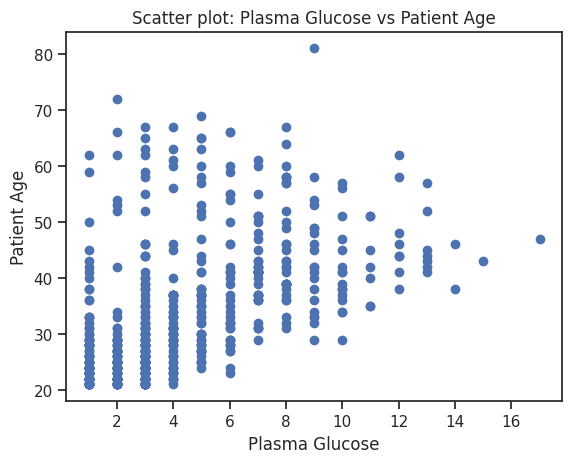

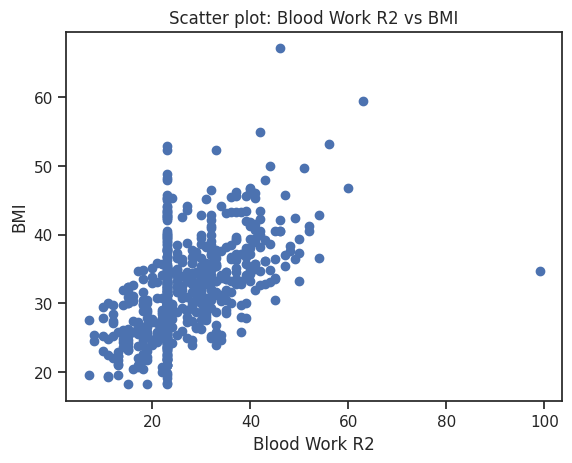

In [ ]:
# Nuage de points : Plasma_glucose vs Patient_age
plt.scatter(num_df['Plasma_glucose'], num_df['Patient_age'])
plt.xlabel('Plasma Glucose')
plt.ylabel('Patient Age')
plt.title('Scatter plot: Plasma Glucose vs Patient Age')
plt.show()

# Nuage de points : Blood_Work_R2 vs BMI
plt.scatter(num_df['Blood_Work_R2'], num_df['BMI'])
plt.xlabel('Blood Work R2')
plt.ylabel('BMI')
plt.title('Scatter plot: Blood Work R2 vs BMI')
plt.show()

Remarque :

Les points de données dans Plasma_glucose et Patient_age sont largement dispersés. Un cluster serré suggère une relation forte, tandis qu'une large dispersion indique une relation faible ou aucune relation du tout.

Les points de données dans Blood_Work_R2 et BMI sont proches les uns des autres et ont une relation positive linéaire. Nous allons donc explorer cela plus en détail.

In [ ]:
# Calculez la valeur p-value pour la corrélation entre Blood_Work_R2 et BMI
blood_work_r2 = num_df['Blood_Work_R2']
bmi = num_df['BMI']
corr, p_value = stats.pearsonr(blood_work_r2, bmi)
print("p-value (Blood_Work_R2 and BMI):", p_value)

p-value (Blood_Work_R2 and BMI): 2.3400759848855668e-46


In [ ]:
# use spearman's test to confirm
corr2, p_value2 = stats.spearmanr(blood_work_r2, bmi)
print("p-value2 (Blood_Work_R2 and BMI):", p_value2)

p-value2 (Blood_Work_R2 and BMI): 2.1442057355491957e-53


Les deux p-value sont nettement inférieures à un niveau de signification typique de 0,05

Il existe donc une corrélation statistiquement significative entre Blood_Work_R2 et l'IMC.



# Regardons de plus près la variable d'assurance

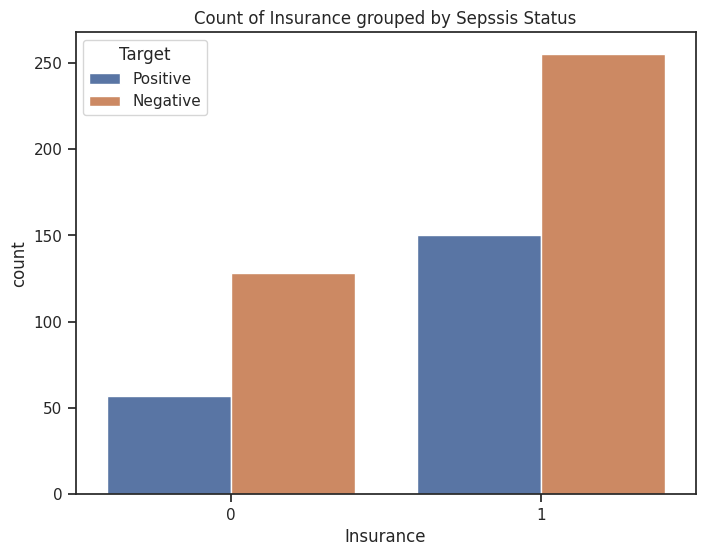

In [ ]:
# Bar plots of categorical variable (Insurance) grouped by Sepssis Target
plt.figure(figsize=(8, 6))
sn.countplot(x='Insurance', hue='Target', data=df)
plt.title('Count of Insurance grouped by Sepssis Status')
plt.show()

**Remarque:** L'assurance n'a pas d'importance puisque le statut Sepsis ne change pas si vous avez une assurance ou non

nous supprimerons donc également la colonne assurance plus tard


**Hypothèse**

 Hypothèse nulle : l'âge ne détermine pas si un patient développera une septicémie.

Hypothèse alternative : l'âge détermine si un patient développera une septicémie.

# Validation d'hypothèse

# C'est quoi la p-value et la statistique

La  p-value est comme un « indicateur de force » pour nos données. Cela nous indique à quel point les preuves sont solides contre une idée particulière. Une petite p-value signifie que les preuves sont solides et suggère que notre idée est probablement vraie, tandis qu'une p-value élevée signifie que les preuves sont faibles et que notre idée peut ne pas être vraie.

La statistique t est comme un « détecteur de différence » entre deux groupes. Il mesure la différence entre les valeurs moyennes entre deux groupes et la compare à la variation au sein de chaque groupe. Une statistique t plus grande signifie qu’il existe une plus grande différence entre les groupes comparés.

En termes plus simples, la p-value nous aide à décider si notre idée est probablement vraie ou non, et la statistique t nous indique l'ampleur de la différence entre deux groupes.


In [ ]:
# Split the data into two groups based on the Sepssis variable
target_positive = df[df['Target'] == 'Positive']
target_negative= df[df['Target'] == 'Negative']

# Extract the Age(Patient_age) values for each group
age_target_positive = target_positive['Patient_age']
age_target_negative = target_negative['Patient_age']

# Perform independent samples t-test
t_statistic, p_value = ttest_ind(age_target_positive, age_target_negative)

# Print the results
print("P-Value:", p_value)
print("T-Statistic:", t_statistic)

P-Value: 3.4577022949183645e-07
T-Statistic: 5.1556614056454775


# Interprétation des résultats


Une très petite p_value de 3,4577022949183645e-07 nous permet de conclure qu'il existe une différence significative dans l'âge moyen entre les patients avec et sans sepsis.

Une grande statistique t de 5,1556614056454775 signifie qu'il existe une plus grande différence entre les groupes comparés.

***Hypothèse nulle :*** L'âge ne détermine pas si un patient développera une septicémie.

Hypothèse nulle rejetée !

In [ ]:
df.isnull().sum()

ID                0
Plasma_glucose    0
Blood_Work_R1     0
Blood_Pressure    0
Blood_Work_R2     0
Blood_Work_R3     0
BMI               0
Blood_Work_R4     0
Patient_age       0
Insurance         0
Target            0
dtype: int64


Il n'y a aucune valeur manquante dans l'ensemble de données

. Quels sont les âges des patients les plus jeunes et les plus âgés

In [ ]:
oldest_age = df['Patient_age'].max()
youngest_age= df['Patient_age'].min()

In [ ]:
print(f'Les patients les plus jeunes et les plus âgés sont {youngest_age} et {oldest_age} ')

Les patients les plus jeunes et les plus âgés sont 21 et 64 


In [ ]:
average_age = df['Patient_age'].mean()
print(f'The Average age is {average_age:.2f} years old')

The Average age is 33.32 years old


# Quel est le ratio de patients sepsis positifs par rapport aux patients négatifs ?

In [ ]:
# Calculate the count of positive and negative patients
positive_count = df[df['Target'] == 'Positive'].shape[0]
negative_count = df[df['Target'] == 'Negative'].shape[0]

# Calculate the ratio
ratio = positive_count / negative_count

print(f'Le ratio de patients positifs pour le sepsis par rapport aux patients négatifs est de {ratio:.2f}')

Le ratio de patients positifs pour le sepsis par rapport aux patients négatifs est de 0.54


Quel est l’IMC le plus élevé et le plus bas ?

In [ ]:
highest_bmi = df['BMI'].max()
lowest_bmi= df['BMI'].min()

print(f'IMC le plus élevé et le plus bas est {highest_bmi:.2f} et {lowest_bmi:.2f} ')

IMC le plus élevé et le plus bas est 50.51 et 18.20 


# Quel est l’IMC moyen ?

In [ ]:
IMC_moyen = df['BMI'].mean()

print(f'IMC moyen est {IMC_moyen:.2f}')

IMC moyen est 32.34



Existe-t-il une corrélation entre le statut Sepsis et les autres attributs ?


In [ ]:
# Remplacez "Positif" par 1 et "Négatif" par 0
df['Target'] = df['Target'].replace({'Positive': 1, 'Negative': 0})

# Print the updated DataFrame
df.head(5)

,ID,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R2,Blood_Work_R3,BMI,Blood_Work_R4,Patient_age,Insurance,Target
0,ICU200010,6,148,72,35.0,39.0,33.6,0.627000,50,0,1
1,ICU200011,1,85,66,29.0,39.0,26.6,0.351000,31,0,0
2,ICU200012,8,183,64,23.0,39.0,23.3,0.672000,32,1,1
3,ICU200013,1,89,66,23.0,94.0,28.1,0.167000,21,1,0
4,ICU200014,3,137,40,35.0,168.0,43.1,1.253375,33,1,1


In [ ]:
  # Calculer la corrélation entre le statut Sepssis et d'autres attributs
correlation_with_target = df.drop('ID', axis=1).corr()['Target'].drop('Target')

# Set the threshold for significant correlation
threshold = 0.3

# Find the attributes with significant correlation to Sepssis status
significant_correlation = correlation_with_target.abs() > threshold

# Get the attributes with significant correlation to Sepssis status
correlated_attributes = correlation_with_target[significant_correlation]

# Print the attributes with significant correlation to Sepssis status
for attribute, correlation_value in correlated_attributes.items():
    print(f"{attribute} has a moderate correlation with Sepssis status (correlation value: {correlation_value})")

Blood_Work_R1 has a moderate correlation with Sepssis status (correlation value: 0.4614006382433301)
BMI has a moderate correlation with Sepssis status (correlation value: 0.32856225936850497)


# Traitement et ingénierie des fonctionnalités

Vérifier et supprimer les doublons

In [ ]:
#Check for duplicate rows in data
duplicate_rows = df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 0



Imputer les valeurs manquantes

In [ ]:
missing_values = df.isna().sum()
print(missing_values)

ID                0
Plasma_glucose    0
Blood_Work_R1     0
Blood_Pressure    0
Blood_Work_R2     0
Blood_Work_R3     0
BMI               0
Blood_Work_R4     0
Patient_age       0
Insurance         0
Target            0
dtype: int64



# Supprimez les colonnes inutiles

Nous supprimerons Blood_work_R2 car il est également fortement corrélé à l'IMC

Nous supprimerons la colonne ID

nous abandonnons également l'assurance car ce n'est pas pertinent

In [ ]:
df_new = df.drop(['Blood_Work_R2', 'ID', 'Insurance'], axis=1)
df_new

,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R3,BMI,Blood_Work_R4,Patient_age,Target
0,6,148,72,39.0,33.6,0.627000,50,1
1,1,85,66,39.0,26.6,0.351000,31,0
2,8,183,64,39.0,23.3,0.672000,32,1
3,1,89,66,94.0,28.1,0.167000,21,0
4,3,137,40,168.0,43.1,1.253375,33,1
...,...,...,...,...,...,...,...,...
594,6,123,72,230.0,33.6,0.733000,34,0
595,3,188,82,185.0,32.0,0.682000,22,1
596,3,67,76,39.0,45.3,0.194000,46,0
597,1,89,40,25.0,27.8,0.559000,21,0


# Fractionnement des données

In [ ]:
# On Utilise train_test_split avec un random_state et ajoutez une stratification pour la classification
# On Divise les données en ensembles de train et de validation
X_train, X_test, y_train, y_test = train_test_split(df_new.iloc[:, :-1],
                                                    df_new.iloc[:, -1:],
                                                    test_size=0.2, random_state=42,
                                                    stratify=df_new.iloc[:, -1:])

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((472, 7), (118, 7), (472, 1), (118, 1))

In [ ]:
X_train

,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R3,BMI,Blood_Work_R4,Patient_age
244,2,146,76,194.0,38.2000,0.329,29
5,5,116,74,39.0,25.6000,0.201,30
115,4,146,92,39.0,31.2000,0.539,61
123,5,132,80,39.0,26.8000,0.186,64
99,1,122,90,220.0,49.7000,0.325,31
...,...,...,...,...,...,...,...
125,1,88,40,99.0,50.5125,0.496,26
69,4,146,85,100.0,28.9000,0.189,27
112,1,89,76,37.0,31.2000,0.192,23
178,5,143,78,39.0,45.0000,0.190,47


In [ ]:
y_train

,Target
244,0
5,0
115,1
123,0
99,1
...,...
125,1
69,0
112,0
178,0


# Vérification du déséquilibre des données

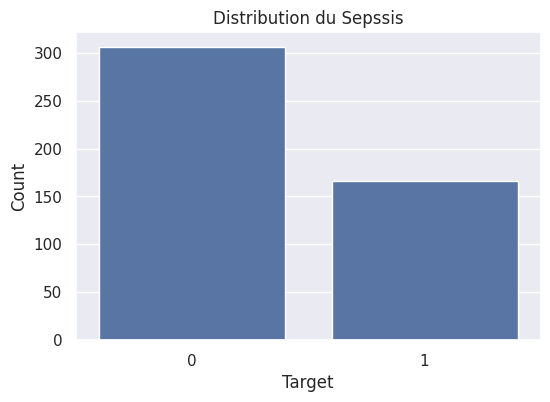

In [ ]:
plt.figure(figsize=(6, 4))
sns.set(style="darkgrid")
sns.countplot(x='Target', data=y_train)

plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution du Sepssis')

plt.show()

L'ensemble de données est déséquilibré et nous ne pouvons donc pas utiliser le score de précision pour choisir notre modèle

Pour résoudre ce problème : nous allons suréchantillonner notre classe minoritaire à l'aide de RandomOverSampler.

In [ ]:
# Créez un DataFrame pour représenter y_train
y_train_df = pd.DataFrame(y_train, columns=['Target'])

# Afficher la distribution des classes du DataFrame y_train d'origine
print("Original class distribution:")
print(y_train_df['Target'].value_counts())

# Effectuer un suréchantillonnage aléatoire sur les données d'entraînement
ros = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Créez un DataFrame pour représenter le y_train rééchantillonné
y_train_resampled_df = pd.DataFrame(y_train_resampled, columns=['Target'])

# Afficher la distribution des classes du DataFrame y_train rééchantillonné
print("\nResampled class distribution:")
print(y_train_resampled_df['Target'].value_counts())

# Attribuez les données rééchantillonnées à X_train et y_train
X_train, y_train = X_train_resampled, y_train_resampled

Original class distribution:
Target
0    306
1    306
Name: count, dtype: int64

Resampled class distribution:
Target
0    306
1    306
Name: count, dtype: int64



# Mise à l'échelle des fonctionnalités

In [ ]:
# On Crée une instance de StandardScaler et définissez la sortie comme un DataFrame
scaler = StandardScaler().fit(X_train).set_output (transform="pandas")

# On Mets à l'échelle les données d'entraînement
X_train_df = scaler.transform(X_train)

#On Mets à l'échelle les données de test en utilisant le même scaler
X_test_df = scaler.transform(X_test)

**Machine Learning**

Voici la section pour construire, entraîner, évaluer et comparer les modèles les uns aux autres

**1. RandomForest Classifier**

In [ ]:
# creer le modele
rf_model= RandomForestClassifier()

In [ ]:
y_train = y_train.ravel()


In [ ]:
# train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Predict on the test dataset
rf_pred= rf_model.predict(X_test)
rf_proba= rf_model.predict_proba(X_test)[:,1]

In [ ]:
# model evaluation
r_rf=  recall_score(y_test, rf_pred)
print("recall_score : ", r_rf)

p_rf= precision_score(y_test, rf_pred)
print("precision_score :",p_rf)

f1_rf= f1_score(y_test, rf_pred)
print("f1_score :", f1_rf)


f2_rf = fbeta_score(y_test, rf_pred, beta=2, average='binary')
print("f2_score :", f2_rf)

0A_rf= accuracy_score(y_test, rf_pred)
print("accuracy_score :",A_rf)

acu_rf = roc_auc_score(rf_pred, y_test)
print("ROC_AUC Score:",acu_rf)


recall_score :  0.7073170731707317
precision_score : 0.6744186046511628
f1_score : 0.6904761904761904
f2_score : 0.7004830917874395
accuracy_score : 0.7796610169491526
ROC_AUC Score: 0.7572093023255813


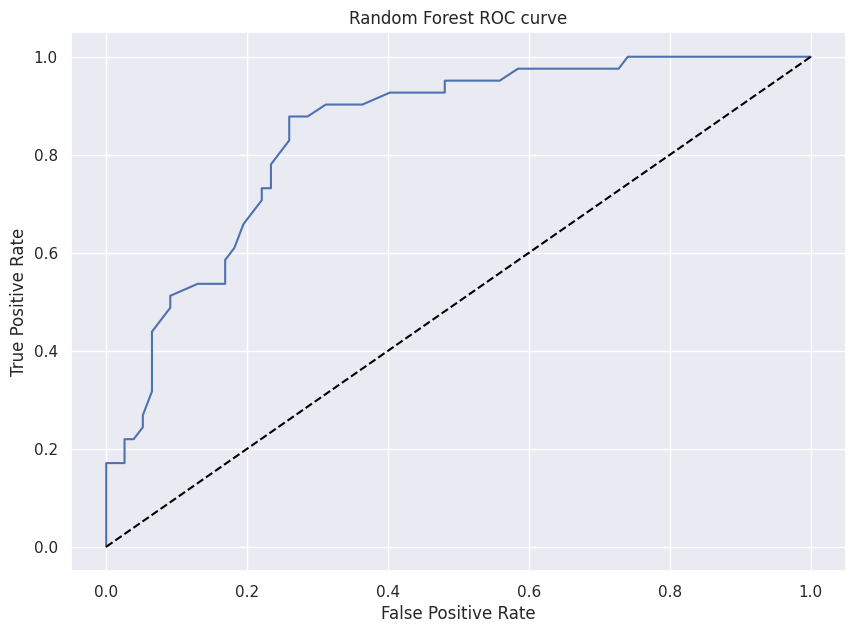

In [ ]:
# plot the model evaluation
fig, ax = plt.subplots(figsize=(10,7))
fpr, tpr, _ = roc_curve(y_test, rf_proba)

plt.title('Random Forest ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

# ** Logistic Regression**

In [ ]:
# Instanciate the model
lr = LogisticRegression(random_state=42)

In [ ]:
# Train the model on the training set
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Predict on the test dataset
pred = lr.predict(X_test)
0prob = lr.predict_proba(X_test)[:,1]

In [ ]:
# model evaluation
r_lgt= recall_score(y_test, pred)
print("recall_score : ", r_lgt)

p_lgt= precision_score(y_test, pred)
print("precision_score :",p_lgt)

f1_lgt= f1_score(y_test, pred)
print("f1_score :", f1_lgt)

f2_lgt = fbeta_score(y_test, pred, beta=2, average='binary')
print("f2_score :", f2_lgt)

A_lgt= accuracy_score(pred, y_test)
print("accuracy_score :",A_lgt)

acu_lgt = roc_auc_score(pred, y_test)
print("ROC_AUC Score:",acu_lgt)

recall_score :  0.7560975609756098
precision_score : 0.62
f1_score : 0.6813186813186813
f2_score : 0.7242990654205608
accuracy_score : 0.7542372881355932
ROC_AUC Score: 0.7364705882352942


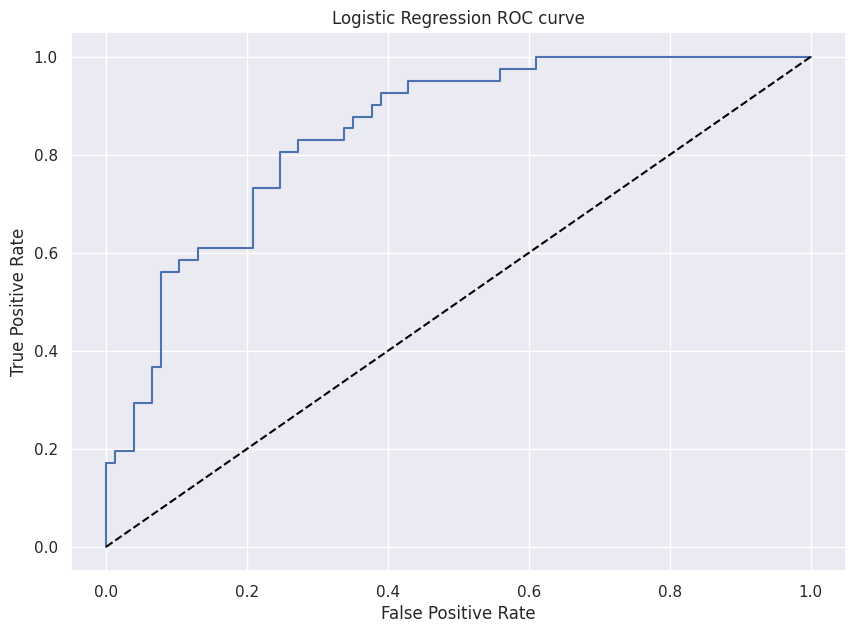

In [ ]:
# plot the model evaluation
fpr, tpr, _ = roc_curve(y_test, prob)
fig, ax = plt.subplots(figsize=(10,7))
plt.title('Logistic Regression ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

# **XGBoost Classifier**

In [ ]:
# create the model
xg_model= XGBClassifier()

In [ ]:
# train the model
xg_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
import pickle

#export the model to FastAPI
with open('model.pkl', 'wb') as f:
    pickle.dump(xg_model, f)

In [ ]:
Y_train.head(10)

NameError: name 'Y_train' is not defined

In [ ]:
X_train.head(10)

,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R3,BMI,Blood_Work_R4,Patient_age
0,2,146,76,194.0,38.2,0.329,29
1,5,116,74,39.0,25.6,0.201,30
2,4,146,92,39.0,31.2,0.539,61
3,5,132,80,39.0,26.8,0.186,64
4,1,122,90,220.0,49.7,0.325,31
5,6,93,50,64.0,28.7,0.356,23
6,8,110,76,39.0,27.8,0.237,58
7,1,93,56,39.0,22.5,0.417,22
8,4,96,56,49.0,20.8,0.340,26
9,3,150,76,39.0,21.0,0.207,37


In [ ]:
# Predict on the test dataset
xg_pred = xg_model.predict(X_test)
xg_prob = xg_model.predict_proba(X_test)[:,1]

In [ ]:
# model evaluation
r_xg= recall_score(y_test, xg_pred)
print("recall_score : ", r_xg)

p_xg= precision_score(y_test, xg_pred)
print("precision_score :",p_xg)

f1_xg= f1_score(y_test, xg_pred)
print("f1_score :", f1_xg)

f2_xg = fbeta_score(y_test, xg_pred, beta=2, average='binary')
print("f2_score :", f2_xg)


A_xg= accuracy_score( y_test, xg_pred)
print("accuracy_score :",A_xg)

acu_xg = roc_auc_score(xg_pred, y_test)
print("ROC_AUC Score:",acu_xg)

recall_score :  0.7804878048780488
precision_score : 0.6808510638297872
f1_score : 0.7272727272727273
f2_score : 0.7582938388625592
accuracy_score : 0.7966101694915254
ROC_AUC Score: 0.7770452502247527


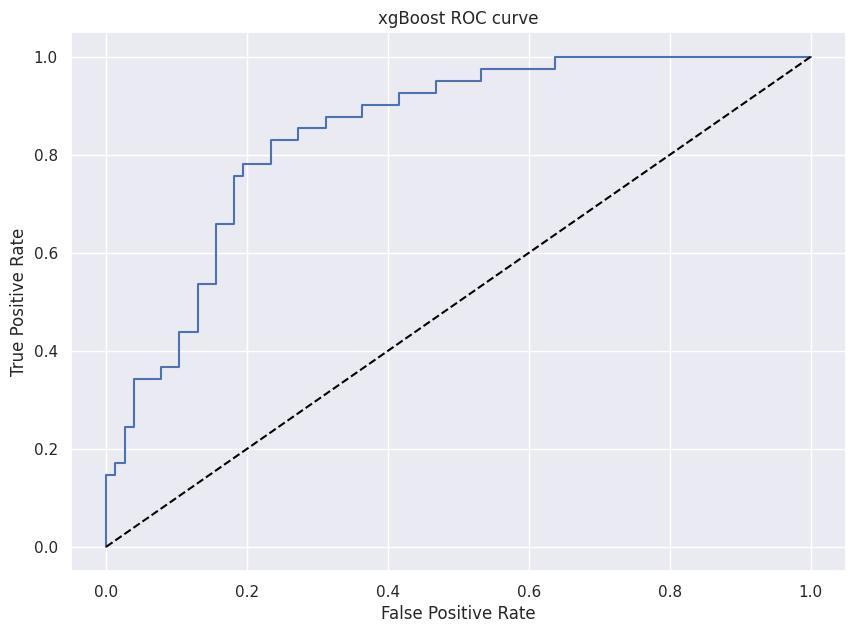

In [ ]:
#  plot the model evaluation
fpr, tpr, _ = roc_curve(y_test, xg_prob)
fig, ax = plt.subplots(figsize=(10,7))
plt.title('xgBoost ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

# **K Nearest Neighbors**

In [ ]:
# create the model
knn_model = KNeighborsClassifier()

In [ ]:
# train the model
knn_model.fit(X_train, y_train)

In [ ]:
# Predict on the test dataset
knn_pred = knn_model.predict(X_test)
knn_prob = knn_model.predict_proba(X_test)[:,1]

In [ ]:
# model evaluation
r_knn= recall_score(y_test, knn_pred)
print("recall_score : ", r_knn)

p_knn= precision_score(y_test, knn_pred)
print("precision_score :",p_knn)

f1_knn= f1_score(y_test, knn_pred)
print("f1_score :", f1_knn)

f2_knn = fbeta_score(y_test, knn_pred, beta=2, average='binary')
print("f2_score :", f2_knn)


A_knn= accuracy_score( y_test, knn_pred)
print("accuracy_score :", A_knn)

acu_knn = roc_auc_score(knn_pred, y_test)
print("ROC_AUC Score:",acu_knn)

In [ ]:
#  plot the model evaluation
fpr, tpr, _ = roc_curve(y_test, knn_prob)
fig, ax = plt.subplots(figsize=(10,7))
plt.title('knn ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

# **Support Vector Machines**

In [ ]:
# Create the Model
svc_model = SVC(kernel='rbf',
                C=51,
                gamma=1,
                probability=True)

In [ ]:
# train the model
svc_model.fit(X_train, y_train)

In [ ]:
# Predict on the test dataset
svc_pred = svc_model.predict(X_test)
svc_prob = svc_model.predict_proba(X_test)[:,1]

In [ ]:
# model evaluation
r_svc = recall_score(y_test, svc_pred)
print("recall_score: ", r_svc)

p_svc = precision_score(y_test, svc_pred)
print("precision_score: ", p_svc)

f1_svc = f1_score(y_test, svc_pred)
print("f1_score: ", f1_svc)

f2_svc = fbeta_score(y_test, svc_pred, beta=2, average='binary')
print("f2_score: ", f2_svc)

A_svc = accuracy_score(y_test, svc_pred)
print("accuracy_score: ", A_svc)

# Check if both classes are present in y_test before calculating ROC AUC
if len(np.unique(y_test)) == 2:
    acu_svc = roc_auc_score(y_test, svc_pred)
    print("ROC_AUC Score: ", acu_svc)
else:
    print("Only one class present in y_test. ROC AUC score is not defined in that case.")

In [ ]:
#  plot the model evaluation
fpr, tpr, _ = roc_curve(y_test, svc_prob)
fig, ax = plt.subplots(figsize=(10,7))
plt.title('svc ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

# **DecisionTreeClassifier**

In [ ]:
# create the model
dtmodel = DecisionTreeClassifier()

In [ ]:
# train the model
dtmodel.fit(X_train, y_train)

In [ ]:
# Predict on the test dataset
dt_pred = dtmodel.predict(X_test)
dt_prob = dtmodel.predict_proba(X_test)[:,1]

In [ ]:
# model evaluation
r_dt= recall_score(y_test, dt_pred)
print("recall_score : ", r_dt)

p_dt= precision_score(y_test, dt_pred)
print("precision_score :",p_dt)

f1_dt= f1_score(y_test, dt_pred)
print("f1_score :", f1_dt)

f2_dt = fbeta_score(y_test, dt_pred, beta=2, average='binary')
print("f2_score :", f2_dt)


A_dt= accuracy_score( y_test, dt_pred)
print("accuracy_score :", A_dt)

acu_dt = roc_auc_score(dt_pred, y_test)
print("ROC_AUC Score:",acu_dt)

# **Gradient Boosting Classifier**

In [ ]:
# create the model
gbc = GradientBoostingClassifier(random_state=42)

In [ ]:
# train the model
gbc.fit(X_train, y_train)

In [ ]:
# Predict on the test dataset
gbc_pred = gbc.predict(X_test)
gbc_prob = gbc.predict_proba(X_test)[:,1]

In [ ]:
# model evaluation
r_gbc= recall_score(y_test, gbc_pred)
print("recall_score : ", r_gbc)

p_gbc= precision_score(y_test, gbc_pred)
print("precision_score :",p_gbc)

f1_gbc= f1_score(y_test, gbc_pred)
print("f1_score :", f1_gbc)

f2_gbc = fbeta_score(y_test, gbc_pred, beta=2, average='binary')
print("f2_score :", f2_gbc)


A_gbc= accuracy_score( y_test, gbc_pred)
print("accuracy_score :", A_gbc)

acu_gbc = roc_auc_score(gbc_pred, y_test)
print("ROC_AUC Score:",acu_gbc)

# **Comparaison des modèles **

In [ ]:
compare_models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'K Nearest Neighbors', 'Support Vector Machines', 'Decision Tree', 'Gradient Boosting']

data = {'Accuracy': [A_lgt, A_rf, A_xg, A_knn, A_svc, A_dt, A_gbc],
        'Recall': [r_lgt, r_rf, r_xg, r_knn, r_svc, r_dt, r_gbc],
        'Precision': [p_lgt, p_rf, p_xg, p_knn, p_svc, p_dt, p_gbc],
        'F1 Score': [f1_lgt, f1_rf, f1_xg, f1_knn, f1_svc, f1_dt, f1_gbc],
        'F2 Score': [f2_lgt, f2_rf, f2_xg, f2_knn, f2_svc, f2_dt, f2_gbc],
        'ROC AUC': [acu_lgt, acu_rf, acu_xg, acu_knn, acu_svc, acu_dt, acu_gbc],
        'Description': ['' for _ in compare_models]}

result = pd.DataFrame(data=data, index=compare_models)
best_model = result['F1 Score'].idxmax()  # Get the index of the model with the highest F1 score
result.at[best_model, 'Description'] = 'Best Model'  # Update the description for the best model
result

# **k-Fold cross validation**

In [ ]:
from sklearn.model_selection import KFold
def kfold_cross_validation(model, model_name, X=X_train, y=y_train, n_splits=5, scoring='f1'):
    """
    Perform k-fold cross-validation for a given model and store the results in a DataFrame.

    Args:
        model: The model to be evaluated.
        model_name: The name of the model.
        X: The feature dataset.
        y: The target variable.
        n_splits: The number of folds for cross-validation.
        scoring: The scoring metric used for evaluation.
    """
    kf = KFold(n_splits=n_splits, shuffle=True)
    scores = cross_val_score(model, X, y, cv=kf, scoring=scoring, error_score="raise")
    cv_score_mean = scores.mean()
    cv_score_stdev = stdev(scores)

    global cross_validation_df
    cross_validation_df = cross_validation_df.append({'Model': model_name, 'F1 Score': cv_score_mean}, ignore_index=True)

In [ ]:
# Create an empty DataFrame to store the results
cross_validation_df = pd.DataFrame(columns=['Model', 'F1 Score'])

# **Répétez la validation croisée pour tous les modèles formés**\

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score

# Fonction de validation croisée
def kfold_cross_validation(model, model_name, X, y, cv=5):
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    return pd.DataFrame({
        'Model': [model_name] * cv,
        'Fold': list(range(1, cv + 1)),
        'Score': scores
    })


In [ ]:
cross_validation_df = pd.DataFrame()
